In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../input/classification-data/train.csv')
print(df.shape)

#sum toxicity
df['y'] = (df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) ).astype(int)
df = df[['comment_text', 'y']].rename(columns={'comment_text': 'text'})
df.sample(5)

(159571, 8)


,text,y
2801,Lots of places have different dates. Perhaps H...,0
5965,"""\n\n basic income dispute resolution \n\nI do...",0
5918,Nu Metal \n\nWhat i reverted was an unexplaine...,0
31632,Fuck You\nAll I Did Was Put Stuff On My user P...,3
47330,(Sorry for any Inconvenience).User:Harry Weasl...,0


In [3]:
toxic = []
for l in df.y:
    if l == 0:
        toxic.append(0)
    else:
        toxic.append(1)

print(len(df))
df['toxic']= toxic

159571


In [4]:
df['y'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: y, dtype: int64

In [5]:
#get rid of punctuation
import re
df['text'] = df['text'].str.lower()
df['text']  = df['text'].astype(str)
df['text'] = df['text'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))
df['text'] = df['text'].str.replace('nan','')
df

,text,y,toxic
0,explanation why the edits made under my userna...,0,0
1,d aww he matches this background colour i m s...,0,0
2,hey man i m really not trying to edit war it...,0,0
3,more i can t make any real suggestions on im...,0,0
4,you sir are my hero any chance you remember...,0,0
...,...,...,...
159566,and for the second time of asking when ...,0,0
159567,you should be ashamed of yourself that is a ...,0,0
159568,spitzer umm theres no actual article for pr...,0,0
159569,and it looks like it was actually you who put ...,0,0


In [6]:
from nltk import word_tokenize
#tokenize
tokens = [word_tokenize(sentence) for sentence in df.text]
df['tokens'] = tokens 

In [7]:
import gensim
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
#train a word2vec model on all of the data
def word2vec(sentences):
    model = Word2Vec(sentences=sentences,  window=5, min_count=1)
    model.init_sims(replace=True)
    return(model)
model = word2vec(df['tokens'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  import sys


In [8]:
#similarity?
model.wv.most_similar(positive=["fuck"])

[('cunt', 0.6814664006233215),
 ('fucking', 0.6405975222587585),
 ('hell', 0.6323719620704651),
 ('damn', 0.628625750541687),
 ('bitch', 0.618755578994751),
 ('ass', 0.6148983240127563),
 ('fuckin', 0.5878194570541382),
 ('comptuer', 0.5793758034706116),
 ('sarcasticidealist', 0.5783644318580627),
 ('suck', 0.5717217326164246)]

In [9]:
model.wv.most_similar(positive=["nazi"])

[('communist', 0.8454351425170898),
 ('fascist', 0.8294506072998047),
 ('neo', 0.7927463054656982),
 ('nationalist', 0.7609747648239136),
 ('zionist', 0.7376621961593628),
 ('nazis', 0.727400541305542),
 ('liberal', 0.712074339389801),
 ('racist', 0.7036260366439819),
 ('socialist', 0.7035673260688782),
 ('serb', 0.6795352697372437)]

In [10]:
model.wv.most_similar(positive=["comment"])

[('comments', 0.7662959098815918),
 ('remark', 0.7388458847999573),
 ('reply', 0.6995962858200073),
 ('suggestion', 0.6949908137321472),
 ('response', 0.6914228200912476),
 ('message', 0.6874347925186157),
 ('statement', 0.6586191654205322),
 ('post', 0.6476645469665527),
 ('complaint', 0.6327527761459351),
 ('mistake', 0.608933687210083)]

In [11]:
len(df[df['y'] != 0])

16225

In [12]:
len(df[df['y'] == 0])

143346

In [13]:
df_zero = df[df['y'] == 0].sample(16000)
df = df[df['y']!=0].reset_index()

In [14]:
df = pd.concat([df,df_zero])
df['y'].value_counts()

0    16000
1     6360
3     4209
2     3480
4     1760
5      385
6       31
Name: y, dtype: int64

In [15]:
from sklearn.utils import shuffle
df = shuffle(df).reset_index()
df

,level_0,index,text,y,toxic,tokens
0,24793,NaN,a message from it isn t vandal...,0,0,"[a, message, from, it, isn, t, vandalism, it, ..."
1,14933,147109.0,fuck yourself you self important web nazi del...,4,1,"[fuck, yourself, you, self, important, web, na..."
2,1700,NaN,thankyou gareth that s very kind is that mo...,0,0,"[thankyou, gareth, that, s, very, kind, is, th..."
3,124791,NaN,kentucky hoax there has been a recent mov...,0,0,"[kentucky, hoax, there, has, been, a, recent, ..."
4,52666,NaN,july utc once again leave me alon...,0,0,"[july, utc, once, again, leave, me, alone, you..."
...,...,...,...,...,...,...
32220,33332,NaN,jul utc,0,0,"[jul, utc]"
32221,11544,113470.0,i know your racist just admit it,1,1,"[i, know, your, racist, just, admit, it]"
32222,109800,NaN,what you are refering to as an autoflower is a...,0,0,"[what, you, are, refering, to, as, an, autoflo..."
32223,7433,72491.0,and i suck off my own dead father,3,1,"[and, i, suck, off, my, own, dead, father]"


In [16]:
from keras.preprocessing.text import Tokenizer
all_training_words = [word for tokens in df["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in df["tokens"]]
vocab = sorted(list(set(all_training_words)))

tokenizer = Tokenizer(num_words=len(vocab), lower=True, char_level=False)
tokenizer.fit_on_texts(df["tokens"].tolist())
training_sequences = tokenizer.texts_to_sequences(df["tokens"].tolist())
import pickle
with open('tokenizer.pk', 'wb') as fout:
        pickle.dump(tokenizer, fout)

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))
print("Max sentence length is %s" % max(training_sentence_lengths))

Found 60939 unique tokens.
Max sentence length is 1403


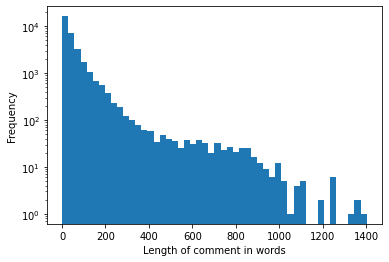

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(training_sentence_lengths,bins = 50)
plt.yscale('log')
plt.xlabel('Length of comment in words')
plt.ylabel('Frequency')
plt.show()

In [18]:
from keras.preprocessing.sequence import pad_sequences
train_rnn_data = pad_sequences(training_sequences, maxlen=50)

In [19]:
train_embedding_weights = np.zeros((len(train_word_index)+1, 100))
for word,index in train_word_index.items():
    try:
        train_embedding_weights[index,:] = model.wv[word]
    except:
        train_embedding_weights[index,:] = np.random.rand(100)
print(train_embedding_weights.shape)

(60940, 100)


In [20]:
def recurrent_nn(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)


    lstm = LSTM(128)(embedded_sequences)
    x = Dense(128, activation='relu')(lstm)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)

    preds = Dense(labels_index, activation='sigmoid')(x)
    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model
print('done')

done


In [21]:
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Model

#let's classify as toxic or not
y_train = df['toxic'].values
x_train = train_rnn_data

model = recurrent_nn(train_embedding_weights, 50, len(train_word_index)+1, 100, 
                    1)
print('training model....')

num_epochs = 8
batch_size = 64
hist = model.fit(x_train, y_train, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 100)           6094000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129   

2022-01-15 17:11:32.672129: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


454/454 [==============================] - 109s 231ms/step - loss: 0.3280 - acc: 0.8649 - val_loss: 0.2987 - val_acc: 0.8818
Epoch 2/8
454/454 [==============================] - 105s 231ms/step - loss: 0.2650 - acc: 0.8918 - val_loss: 0.2563 - val_acc: 0.9007
Epoch 3/8
454/454 [==============================] - 106s 234ms/step - loss: 0.2408 - acc: 0.9030 - val_loss: 0.2403 - val_acc: 0.9038
Epoch 4/8
454/454 [==============================] - 107s 236ms/step - loss: 0.2309 - acc: 0.9062 - val_loss: 0.2329 - val_acc: 0.9044
Epoch 5/8
454/454 [==============================] - 105s 231ms/step - loss: 0.2243 - acc: 0.9081 - val_loss: 0.2553 - val_acc: 0.9063
Epoch 6/8
454/454 [==============================] - 104s 230ms/step - loss: 0.2196 - acc: 0.9106 - val_loss: 0.2251 - val_acc: 0.9091
Epoch 7/8
454/454 [==============================] - 103s 227ms/step - loss: 0.2134 - acc: 0.9140 - val_loss: 0.2228 - val_acc: 0.9082
Epoch 8/8
454/454 [==============================] - 103s 227ms/s

In [22]:
df_val = pd.read_csv("../input/jigsaw-toxic-severity-rating/validation_data.csv")
df_val

,worker,less_toxic,more_toxic
0,313,This article sucks \n\nwoo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,188,"""And yes, people should recognize that but the...",Daphne Guinness \n\nTop of the mornin' my fav...
2,82,"Western Media?\n\nYup, because every crime in...","""Atom you don't believe actual photos of mastu..."
3,347,And you removed it! You numbskull! I don't car...,You seem to have sand in your vagina.\n\nMight...
4,539,smelly vagina \n\nBluerasberry why don't you ...,"hey \n\nway to support nazis, you racist"
...,...,...,...
30103,461,I'm sorry. I'm not an admin. I will give you t...,get out my large penis
30104,527,I'm sorry. I'm not an admin. I will give you t...,get out my large penis
30105,352,"wow...\nare you out of your mind, how was my e...",Piss off you slant eyed-gook
30106,311,"wow...\nare you out of your mind, how was my e...",Piss off you slant eyed-gook


In [23]:
import re
def correct(col):
    df_val[col] = df_val[col].str.lower()
    df_val[col]  =df_val[col].astype(str)
    df_val[col] = df_val[col].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))
    df_val[col] = df_val[col].str.replace('nan','')
    return(list(df_val[col]))

In [24]:
df_val['less_toxic'] = correct('less_toxic')
df_val['more_toxic'] = correct('more_toxic')
df_val['less_tokens'] = [word_tokenize(sentence) for sentence in df_val.less_toxic]
df_val['more_tokens'] = [word_tokenize(sentence) for sentence in df_val.more_toxic]
df_val

,worker,less_toxic,more_toxic,less_tokens,more_tokens
0,313,this article sucks woo woo wooooooo,what ...,"[this, article, sucks, woo, woo, wooooooo]","[what, wher, is, your, sexy, pic, gone, from, ..."
1,188,and yes people should recognize that but the...,daphne guinness top of the mornin my favou...,"[and, yes, people, should, recognize, that, bu...","[daphne, guinness, top, of, the, mornin, my, f..."
2,82,western media yup because every crime in t...,atom you don t believe actual photos of mastu...,"[western, media, yup, because, every, crime, i...","[atom, you, don, t, believe, actual, photos, o..."
3,347,and you removed it you numbskull i don t car...,you seem to have sand in your vagina might w...,"[and, you, removed, it, you, numbskull, i, don...","[you, seem, to, have, sand, in, your, vagina, ..."
4,539,smelly vagina bluerasberry why don t you be...,hey way to support nazis you racist,"[smelly, vagina, bluerasberry, why, don, t, yo...","[hey, way, to, support, nazis, you, racist]"
...,...,...,...,...,...
30103,461,i m sorry i m not an admin i will give you t...,get out my large penis,"[i, m, sorry, i, m, not, an, admin, i, will, g...","[get, out, my, large, penis]"
30104,527,i m sorry i m not an admin i will give you t...,get out my large penis,"[i, m, sorry, i, m, not, an, admin, i, will, g...","[get, out, my, large, penis]"
30105,352,wow are you out of your mind how was my ed...,piss off you slant eyed gook,"[wow, are, you, out, of, your, mind, how, was,...","[piss, off, you, slant, eyed, gook]"
30106,311,wow are you out of your mind how was my ed...,piss off you slant eyed gook,"[wow, are, you, out, of, your, mind, how, was,...","[piss, off, you, slant, eyed, gook]"


In [25]:
train_word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(df_val["less_tokens"].tolist())
test_less = pad_sequences(training_sequences, maxlen=50)
less_pred = model.predict(test_less, batch_size=64, verbose=1)

471/471 [==============================] - 31s 64ms/step


In [26]:
train_word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(df_val["more_tokens"].tolist())
test_more = pad_sequences(training_sequences, maxlen=50)
more_pred = model.predict(test_more, batch_size=64, verbose=1)

471/471 [==============================] - 30s 64ms/step


In [27]:
df_val['less_pred'] = less_pred
df_val['more_pred'] = more_pred
df_val

,worker,less_toxic,more_toxic,less_tokens,more_tokens,less_pred,more_pred
0,313,this article sucks woo woo wooooooo,what ...,"[this, article, sucks, woo, woo, wooooooo]","[what, wher, is, your, sexy, pic, gone, from, ...",0.996407,0.700089
1,188,and yes people should recognize that but the...,daphne guinness top of the mornin my favou...,"[and, yes, people, should, recognize, that, bu...","[daphne, guinness, top, of, the, mornin, my, f...",0.129478,0.991517
2,82,western media yup because every crime in t...,atom you don t believe actual photos of mastu...,"[western, media, yup, because, every, crime, i...","[atom, you, don, t, believe, actual, photos, o...",0.769376,0.469079
3,347,and you removed it you numbskull i don t car...,you seem to have sand in your vagina might w...,"[and, you, removed, it, you, numbskull, i, don...","[you, seem, to, have, sand, in, your, vagina, ...",0.832941,0.999339
4,539,smelly vagina bluerasberry why don t you be...,hey way to support nazis you racist,"[smelly, vagina, bluerasberry, why, don, t, yo...","[hey, way, to, support, nazis, you, racist]",0.994024,0.990495
...,...,...,...,...,...,...,...
30103,461,i m sorry i m not an admin i will give you t...,get out my large penis,"[i, m, sorry, i, m, not, an, admin, i, will, g...","[get, out, my, large, penis]",0.987631,0.996454
30104,527,i m sorry i m not an admin i will give you t...,get out my large penis,"[i, m, sorry, i, m, not, an, admin, i, will, g...","[get, out, my, large, penis]",0.987631,0.996454
30105,352,wow are you out of your mind how was my ed...,piss off you slant eyed gook,"[wow, are, you, out, of, your, mind, how, was,...","[piss, off, you, slant, eyed, gook]",0.276062,0.987499
30106,311,wow are you out of your mind how was my ed...,piss off you slant eyed gook,"[wow, are, you, out, of, your, mind, how, was,...","[piss, off, you, slant, eyed, gook]",0.276062,0.987499


In [28]:
len(df_val[df_val['more_pred']>df_val['less_pred']])/(len(df_val[df_val['more_pred']<df_val['less_pred']])+len(df_val[df_val['more_pred']>df_val['less_pred']]))

0.673774412116381

In [29]:
to_score = pd.read_csv('../input/jigsaw-toxic-severity-rating/comments_to_score.csv')
to_score

,comment_id,text
0,114890,"""\n \n\nGjalexei, you asked about whether ther..."
1,732895,"Looks like be have an abuser , can you please ..."
2,1139051,I confess to having complete (and apparently b...
3,1434512,"""\n\nFreud's ideas are certainly much discusse..."
4,2084821,It is not just you. This is a laundry list of ...
...,...,...
7532,504235362,"Go away, you annoying vandal."
7533,504235566,This user is a vandal.
7534,504308177,""" \n\nSorry to sound like a pain, but one by f..."
7535,504570375,Well it's pretty fucking irrelevant now I'm un...


In [30]:
to_score['text'] = to_score['text'].str.lower()
to_score['text']  =to_score['text'].astype(str)
to_score['text'] = to_score['text'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))
to_score['text'] = to_score['text'].str.replace('nan','')


In [31]:
to_score['tokens'] = [word_tokenize(sentence) for sentence in to_score.text]
train_word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(to_score["tokens"].tolist())
test_seq = pad_sequences(training_sequences, maxlen=50)
pred = model.predict(test_seq, batch_size=512, verbose=1)

15/15 [==============================] - 2s 158ms/step


In [32]:
to_score['score'] = pred
to_score

,comment_id,text,tokens,score
0,114890,gjalexei you asked about whether there i...,"[gjalexei, you, asked, about, whether, there, ...",0.030495
1,732895,looks like be have an abuser can you please ...,"[looks, like, be, have, an, abuser, can, you, ...",0.009305
2,1139051,i confess to having complete and apparently b...,"[i, confess, to, having, complete, and, appare...",0.064807
3,1434512,freud s ideas are certainly much discussed ...,"[freud, s, ideas, are, certainly, much, discus...",0.526727
4,2084821,it is not just you this is a laundry list of ...,"[it, is, not, just, you, this, is, a, laundry,...",0.935378
...,...,...,...,...
7532,504235362,go away you annoying vandal,"[go, away, you, annoying, vandal]",0.968922
7533,504235566,this user is a vandal,"[this, user, is, a, vandal]",0.541132
7534,504308177,sorry to sound like a pain but one by fol...,"[sorry, to, sound, like, a, pain, but, one, by...",0.580872
7535,504570375,well it s pretty fucking irrelevant now i m un...,"[well, it, s, pretty, fucking, irrelevant, now...",0.999757


In [33]:
to_score[['comment_id','score']].to_csv('submission.csv',index=False)